AGE AND GENDER DETECTOR

This project is built to detect age and gender of a person with high accuracy. Here we extract the data, train it and fit it into our model and then evaluate the results and optimize the model for better results.

Import Necessary Libraries

In [139]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

Extract data from the Dataset

In [140]:
fldr = "./UTKFace"

In [141]:
import os
files = os.listdir(fldr)

Create list of images from the dataset.

In [142]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr + '/' + fle
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

Create list of age and genders from the dataset.

In [143]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

Viewing a sample

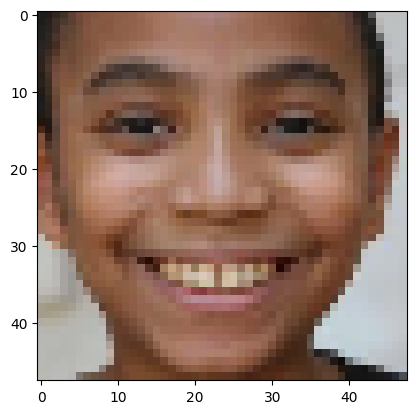

In [144]:
plt.imshow(images[87])

In [145]:
print(ages[87])

10


In [146]:
print(genders[87])

0


Save Image, Age, Gender Arrays in the system

In [147]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [148]:
np.save(fldr + 'images.npy', images_f)
np.save(fldr + 'ages.npy', ages_f)
np.save(fldr + 'genders.npy', genders_f)

Finding number of elements in dataset (male,female)

In [149]:
values,counts = np.unique(genders_f, return_counts = True)
print(counts)

[12391 11317]


Plotting the Number of Male and Female Samples

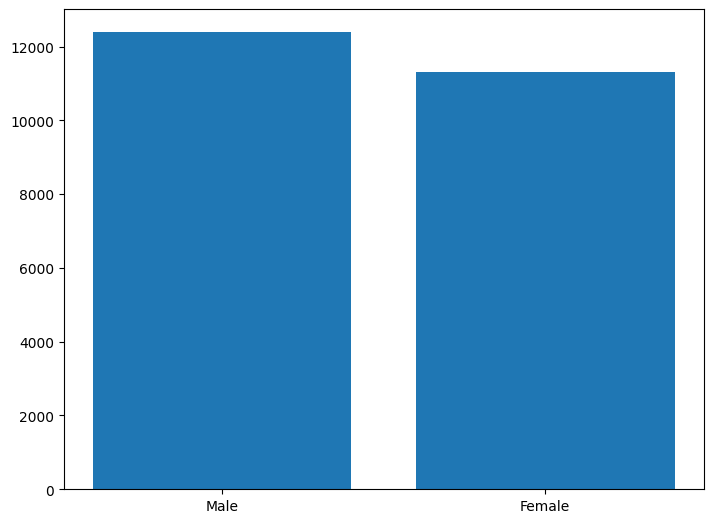

In [150]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values = [12391,11317]
ax.bar(gender,values)
plt.show()

Number of Samples in each Age Group

In [151]:
values, counts = np.unique(ages_f, return_counts = True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


Converting age count to list

In [152]:
val = values.tolist()
cnt = counts.tolist()

Plotting the Samples according to age

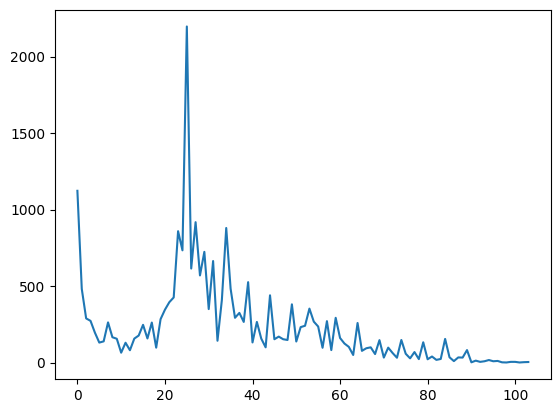

In [153]:
plt.plot(counts)
plt.xlabel = ('ages')
plt.ylabel = ('distribution')
plt.show()

Defining Labels for Outputs

In [154]:
labels = []
i = 0
while i < len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i + 1

Creating another list of images from existing ones for Better learning 

In [155]:
images_f_2 = images_f/255

In [156]:
images_f_2.shape

(23708, 48, 48, 3)

In [157]:
labels_f = np.array(labels)

Splitting the dataset into test and train

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size = 0.25)

In [160]:
Y_train[0:5]

array([[20,  1],
       [ 1,  1],
       [ 1,  0],
       [61,  0],
       [44,  0]])

Splitting 'Y_test' and 'Y_train' further for better understanding

In [161]:
Y_train_2 = [Y_train[:,1], Y_train[:,0]]
Y_test_2 = [Y_test[:,1], Y_test[:,0]]

In [162]:
Y_train_2[0][0:5]

array([1, 1, 0, 0, 0])

In [163]:
Y_train_2[1][0:5]

array([20,  1,  1, 61, 44])

Defining the model

In [164]:
def convolution(input_tensor, filters):
    x = Conv2D(filters = filters, kernel_size = (3,3), padding = "same", strides = (1,1), kernel_regularizer = l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [165]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size = (2, 2))(conv_1)
    conv_2 = convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2))(conv_2)
    conv_3 = convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2))(conv_3)
    conv_4 = convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation = 'relu')(flatten)
    dense_2 = Dense(64, activation = 'relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation = 'sigmoid', name = 'sex_out')(drop_1)
    output_2 = Dense(1, activation = 'relu', name = 'age_out')(drop_1)
    model = Model(inputs = [inputs], outputs = [output_1, output_2])
    model.compile(loss = ["binary_crossentropy", "mae"], optimizer = "Adam", metrics = ["accuracy"])
    return model

In [166]:
Model = model((48, 48, 3))

In [167]:
Model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d_60 (Conv2D)             (None, 48, 48, 32)   896         ['input_16[0][0]']               
                                                                                                  
 dropout_90 (Dropout)           (None, 48, 48, 32)   0           ['conv2d_60[0][0]']              
                                                                                                  
 activation_60 (Activation)     (None, 48, 48, 32)   0           ['dropout_90[0][0]']             
                                                                                            

In [168]:
from tensorflow.keras.callbacks import ModelCheckpoint

Initializing the Model

In [169]:
fle_s = 'Age_Gender_Detection.h5'
checkpoint = ModelCheckpoint(fle_s, monitor = 'val_loss', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto', save_freq = 'epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience = 75, monitor = 'val_loss', restore_best_weights = 'True')
callback_list = [checkpoint, Early_stop]

Running the Model (takes time)

In [170]:
History = Model.fit(X_train, Y_train_2, batch_size = 64, validation_data = (X_test, Y_test_2), epochs = 250, callbacks = callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.9056 - sex_out_loss: 0.8596 - age_out_loss: 15.8598 - sex_out_accuracy: 0.5592 - age_out_accuracy: 0.0476
Epoch 1: val_loss improved from inf to 16.17058, saving model to Age_Gender_Detection.h5
278/278 [==============================] - 106s 336ms/step - loss: 16.9056 - sex_out_loss: 0.8596 - age_out_loss: 15.8598 - sex_out_accuracy: 0.5592 - age_out_accuracy: 0.0476 - val_loss: 16.1706 - val_sex_out_loss: 0.5863 - val_age_out_loss: 15.4119 - val_sex_out_accuracy: 0.7012 - val_age_out_accuracy: 0.0464
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.1757 - sex_out_loss: 0.6403 - age_out_loss: 12.3191 - sex_out_accuracy: 0.6804 - age_out_accuracy: 0.0453
Epoch 2: val_loss improved from 16.17058 to 14.67437, saving model to Age_Gender_Detection.h5
278/278 [==============================] - 101s 362ms/step - loss: 13.1757 - sex_out_loss: 0.6403 - age_out_loss: 12.3191 - sex_out_accuracy: 0.

Model Evaluation

In [171]:
Model.evaluate(X_test, Y_test_2)

186/186 [==============================] - 5s 27ms/step - loss: 7.5355 - sex_out_loss: 0.2548 - age_out_loss: 6.2534 - sex_out_accuracy: 0.8878 - age_out_accuracy: 0.0464


[7.535457611083984,
 0.25484323501586914,
 6.253425598144531,
 0.8878015875816345,
 0.04639783874154091]

In [172]:
pred = Model.predict(X_test)

186/186 [==============================] - 6s 24ms/step


Plotting Loss

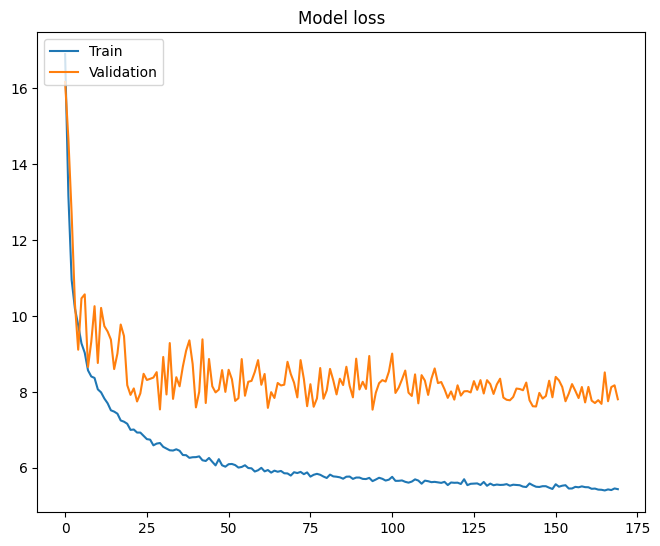

In [173]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel = ('Epoch')
plt.ylabel = ('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0, hspace = 0.25, wspace = 0.35)

Plotting Gender accuray

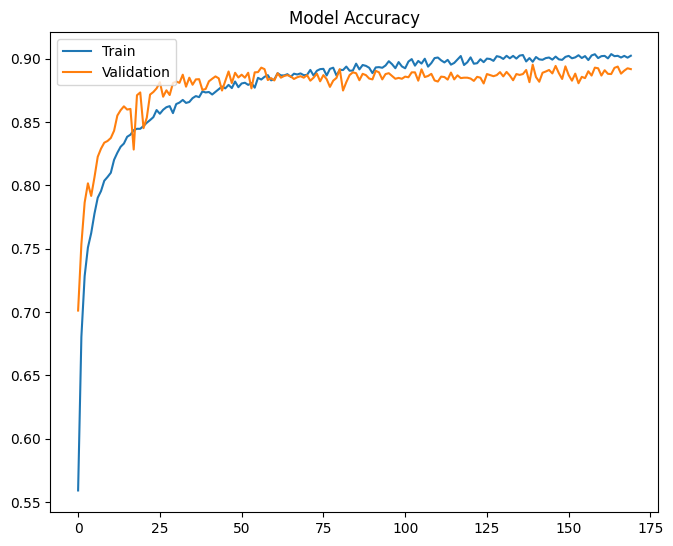

In [174]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel = ('Epoch')
plt.ylabel = ('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0, hspace = 0.25, wspace = 0.35)

Plotting Age Accuracy

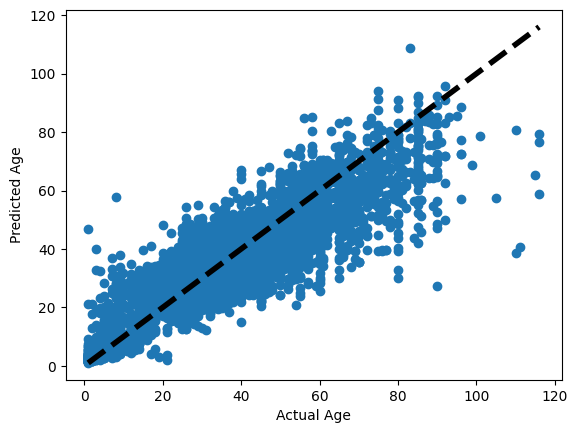

In [175]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(), Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw = 4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

Making a Gender Report of the Model

In [176]:
i = 0
Pred_l = []
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i = i + 1

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [178]:
report = classification_report(Y_test_2[0], Pred_l)

In [179]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3048
           1       0.88      0.88      0.88      2879

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



Making Gender Heatmap of the Model

In [180]:
results = confusion_matrix(Y_test_2[0], Pred_l)

<AxesSubplot:>

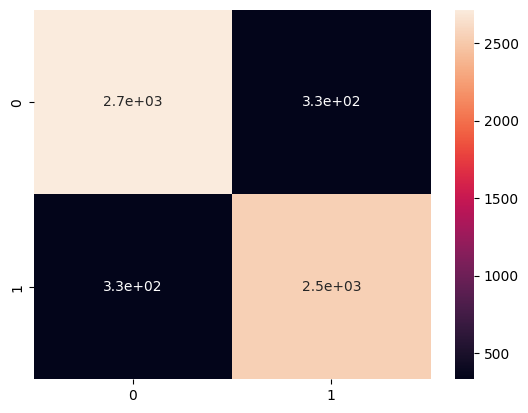

In [198]:
import seaborn as sns
sns.heatmap(results, annot = True)

Testing the Predictions

In [182]:
def test_image(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_l[1][0]))
    sex = int(np.round(pred_l[0][0]))
    print("Predicted age is " + str(age))
    print("Predicted gender is " + sex_f[sex])

Test - 1

1/1 [==============================] - 0s 261ms/step
Predicted age is 88
Predicted gender is Female


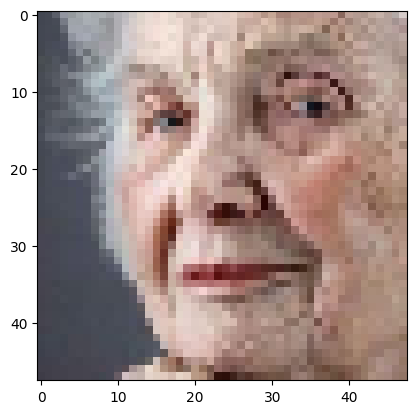

In [199]:
test_image(4, images_f, images_f_2, Model)

Test - 2

1/1 [==============================] - 0s 31ms/step
Predicted age is 11
Predicted gender is Male


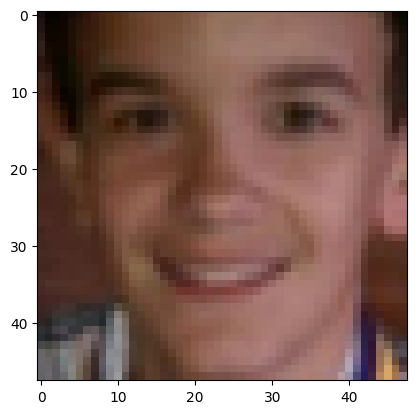

In [196]:
test_image(23, images_f, images_f_2, Model)

Test - 3

1/1 [==============================] - 0s 30ms/step
Predicted age is 10
Predicted gender is Female


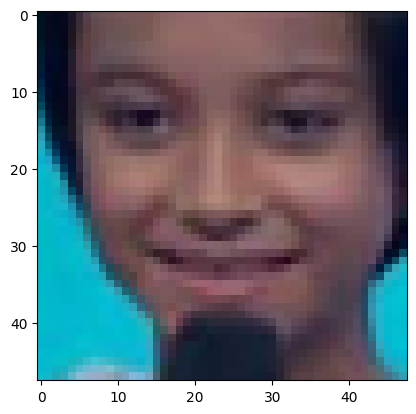

In [197]:
test_image(168, images_f, images_f_2, Model)

Test - 4

1/1 [==============================] - 0s 20ms/step
Predicted age is 16
Predicted gender is Male


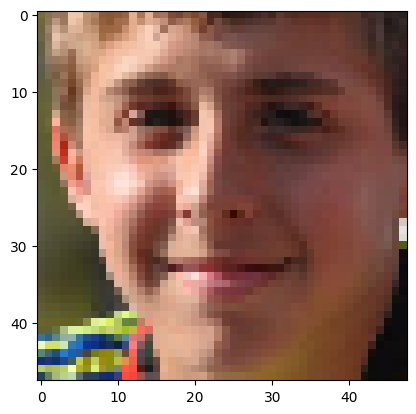

In [193]:
test_image(888, images_f, images_f_2, Model)

Test - 5

1/1 [==============================] - 0s 369ms/step
Predicted age is 23
Predicted gender is Female


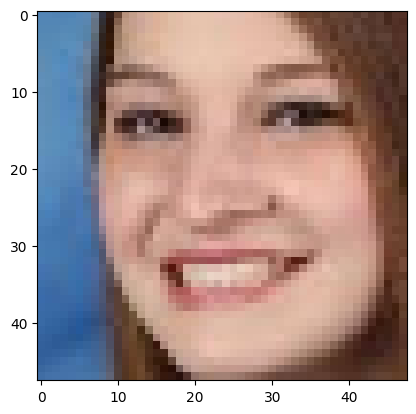

In [195]:
test_image(1288, images_f, images_f_2, Model)